# Exercise in Photogrammetry I
## **Ex.6 : Matching**
### Points: 15

## A. Cross Correlation

We have given an image ```I``` of an text. We would like to find all the locations of the letter 'a' in this text.

**Tasks:**
1. Load the image ```'images/text.png'``` as an grayscale image and visualize it. Convert it for further computations to float values. (1 Point)
2. Extract the letter 'a' from the image at ```I(13:22,66:75)```. The resulting patch should be of size *(9x9)*. Visualize it and print out the shape. (1 Point)
3. Write a function ```imageCorrelation(image,patch)``` which computes the correlation between an image and a patch. Compute the correlation values only for the pixels where the neighborhood is well defined.
**Hint:** You can modify the function ```imageConv(...)``` from the last exercise for this. The kernel must not be flipped for the correlation. You have to normalize the kernel and the neighborhood so that both are standard normal distributed: $N_{ij} \in N(0,1), w_{ij}\in N(0,1)$. (5 Points)
4. Compute the correlation for the given image and the extracted patch. Visualize the result. (1 Point)
5. Search and mark the maxima in the correlation image. A maxima is each pixel over 80% of the global maxima. (2 Points)
6. Why are only 3 of 5 a's detected. Write your answer in a markdown cell. (1 Points)
7. How can you also detect the other 2 a's. Implement your idea and show that you can find all a's. (4 Points)

In [1]:
# import all required modules
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline

###  1. Load the image ```'images/text.png'``` as an grayscale image and visualize it. Convert it for further computations to float values. (1 Point)

In [2]:
# 1. Load the image as gray scale image and visualize it
img = skimage.io.imread('./images/text.png', as_gray=True)

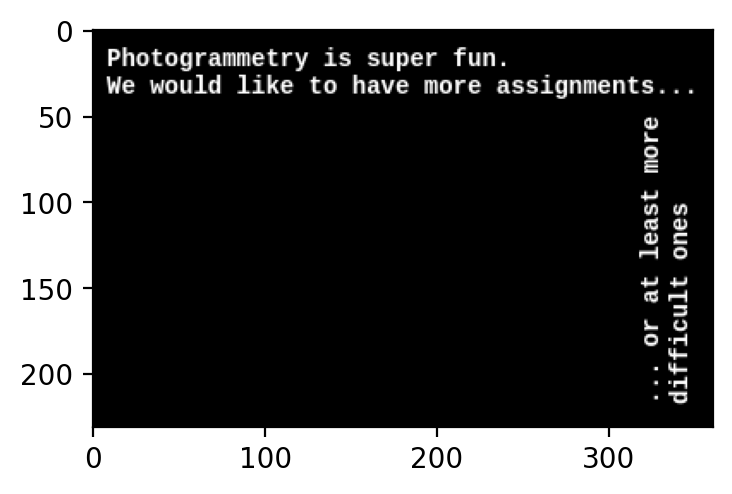

In [3]:
# Visualize it
plt.figure(figsize=(4, 4), dpi=200)
plt.imshow(img, cmap='gray')

In [4]:
print(img.dtype)

float64


### 2. Extract the letter 'a' from the image at ```I(13:22,66:75)```. The resulting patch should be of size *(9x9)*. Visualize it and print out the shape. (1 Point)

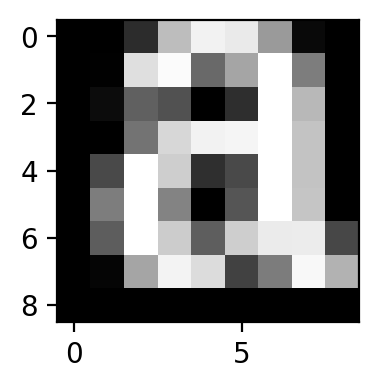

In [5]:
# 2. Extract the leter a from this image, visualize and print shape (9x9)
letter_a = img[13:22, 66:75]
plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(letter_a, cmap='gray')

In [6]:
print(letter_a.shape)

(9, 9)


### 3. Write a function ```imageCorrelation(image,patch)``` which computes the correlation between an image and a patch. Compute the correlation values only for the pixels where the neighborhood is well defined.
**Hint:** You can modify the function ```imageConv(...)``` from the last exercise for this. The kernel must not be flipped for the correlation. You have to normalize the kernel and the neighborhood so that both are standard normal distributed: $N_{ij} \in N(0,1), w_{ij}\in N(0,1)$. (5 Points)

In [7]:
# 3. Write function imageCorrelation(image, patch) which compute the correlation between an image and a patch
from ex06 import imageCorrelation

### 4. Compute the correlation for the given image and the extracted patch. Visualize the result. (1 Point)

In [8]:
rs = imageCorrelation(img, letter_a)

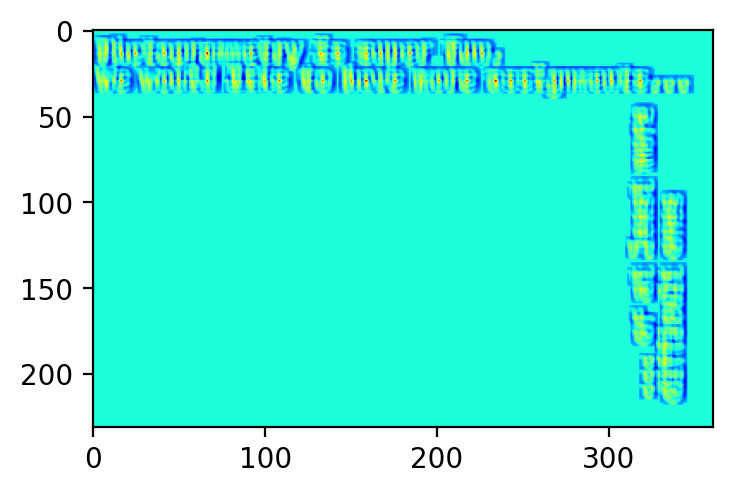

In [9]:
# Visualize the result
plt.figure(figsize=(4, 4), dpi=200)
plt.imshow(rs, cmap='jet')

### 5. Search and mark the maxima in the correlation image. A maxima is each pixel over 80% of the global maxima. (2 Points)

In [10]:
T = 83./100 * np.amax(rs) # Thresh 0.8 is not enough
print(f"Threshold value = {T}")

Threshold value = 0.83


In [11]:
rs_apply_thresh = rs > T

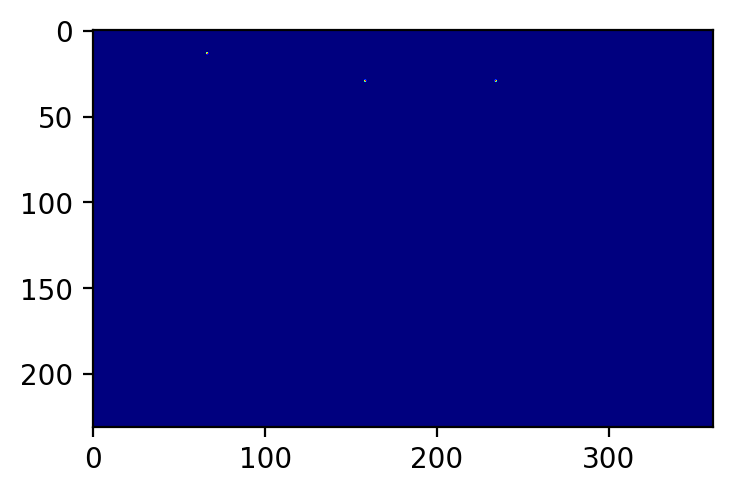

In [12]:
# Visualize the result
plt.figure(figsize=(4, 4), dpi=200)
plt.imshow(rs_apply_thresh, cmap='jet')

In [13]:
match_locations = np.argwhere(rs_apply_thresh == np.amax(rs_apply_thresh))
print("All positions: ")
print(match_locations)

All positions: 
[[ 13  66]
 [ 29 158]
 [ 29 234]]


### 6. Why are only 3 of 5 a's detected. Write your answer in a markdown cell. (1 Points)

Because as the Assumption before using this method, image different between the source and the query only by:
* Translation 
* Brightness
* Contrast

But in this case, 2 rest letter a has different orientation with the query image (90 degress rotation), then the correlation is low then failed to localized them.

### 7. How can you also detect the other 2 a's. Implement your idea and show that you can find all a's. (4 Points)

We can actually rotate the query patch in many orientation, then compute the correlation and choose the largest one among them to set for the value in correlation image

In [14]:
# Import my implemented
from ex06 import imageCorrelation_2

In [16]:
rs_2 = imageCorrelation_2(img, letter_a)

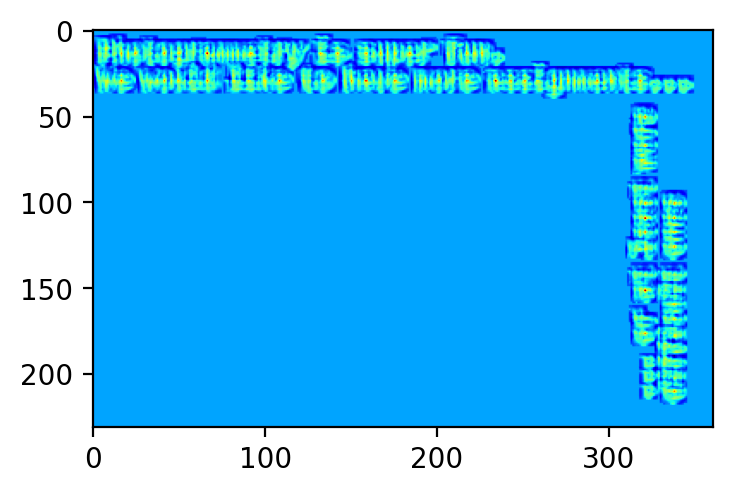

In [17]:
# Visualize the result
plt.figure(figsize=(4, 4), dpi=200)
plt.imshow(rs_2, cmap='jet')

In [18]:
rs_2_apply_thresh = rs_2 > T

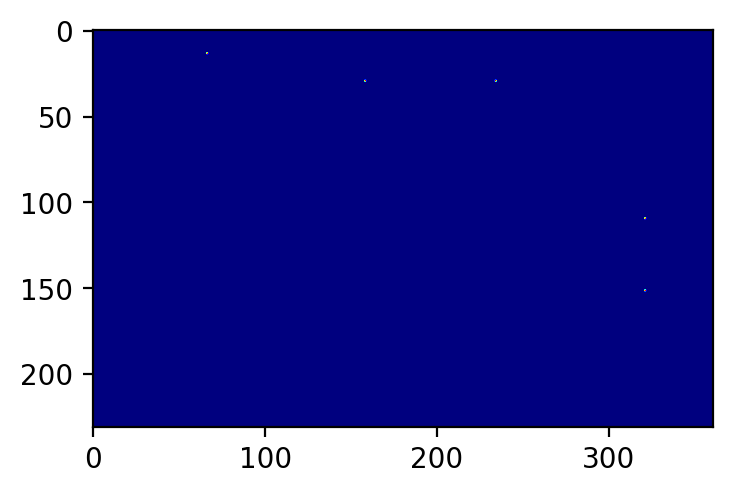

In [19]:
# Visualize the result
plt.figure(figsize=(4, 4), dpi=200)
plt.imshow(rs_2_apply_thresh, cmap='jet')

In [22]:
match_locations = np.argwhere(rs_2_apply_thresh == np.amax(rs_2_apply_thresh))
print("All positions after use the update method: ")
print(match_locations)

All positions after use the update method: 
[[ 13  66]
 [ 29 158]
 [ 29 234]
 [109 321]
 [151 321]]
